## **1. Загрузить любой набор данных с https://www.kaggle.com, подходящий к задачам классификации: в наборе существует ограниченное кол-во определенных классов объектов.**

In [18]:
#* Набор данных должен содержать минимум 4 независимых числовых и 1 зависимый номинальный признак, позволяющий разбить множество записей на определенные группы (классы)
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes_prediction_dataset.csv')
df['gender'].replace(['Female','Male', 'Other'],[0,1, np.nan],inplace=True)
df.drop(columns=['smoking_history'],inplace=True)
df.dropna(inplace=True)
vMin = df.min( axis = 0 )
x = (df - vMin) / (df.max( axis = 0 ) - vMin)
print(x[:100])

    gender       age  hypertension  heart_disease       bmi  HbA1c_level  \
0      0.0  1.000000           0.0            1.0  0.177171     0.563636   
1      0.0  0.674675           0.0            0.0  0.202031     0.563636   
2      1.0  0.349349           0.0            0.0  0.202031     0.400000   
3      0.0  0.449449           0.0            0.0  0.156863     0.272727   
4      1.0  0.949950           1.0            1.0  0.118231     0.236364   
..     ...       ...           ...            ...       ...          ...   
95     1.0  0.236737           0.0            0.0  0.202031     0.472727   
96     0.0  0.837337           0.0            0.0  0.202031     0.490909   
97     1.0  0.136637           0.0            0.0  0.202031     0.472727   
98     0.0  0.374374           0.0            0.0  0.468254     0.454545   
99     1.0  0.361862           0.0            0.0  0.202031     0.236364   

    blood_glucose_level  diabetes  
0              0.272727       0.0  
1              

## **2. Выполнить классификацию методом навного байесовского классификатора:**

In [19]:
#1. Выполнить классификацию, используя следующие его модификации НБ:
#    1.1. GaussianNB
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
X =  np.array( x.iloc[:,:-1] )#.reshape(-1,11)
Y =  np.array( x.iloc[:,-1] )

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.9034887366205383
TEST ACCURACY : 0.9035005303833914


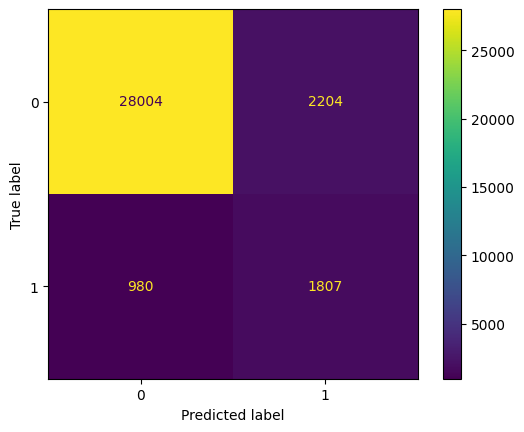

In [21]:
import matplotlib.pyplot as plt
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

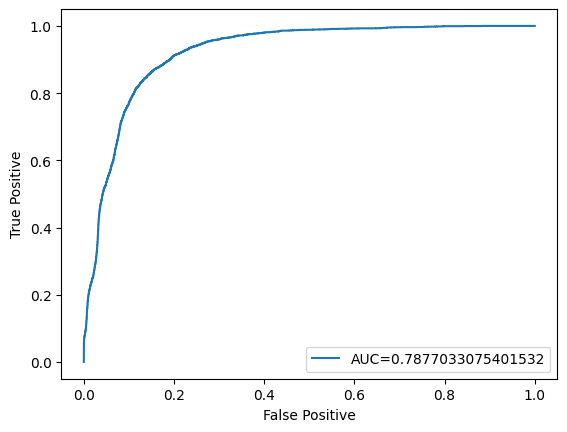

In [22]:
auc = roc_auc_score( y_test, y_test_predict )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [24]:
# 1.2. MultinomialNB()
nb = MultinomialNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]


In [25]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.9045635720363653
TEST ACCURACY : 0.9009849977269283


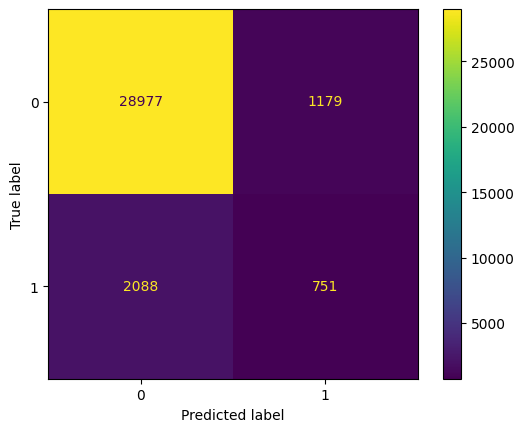

In [26]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

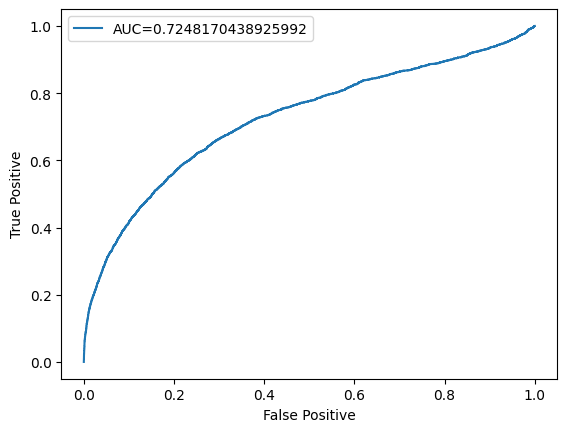

In [27]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [28]:
#1.3. ComplementNB()
nb = ComplementNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [29]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.6733396032065924
TEST ACCURACY : 0.674253674799212


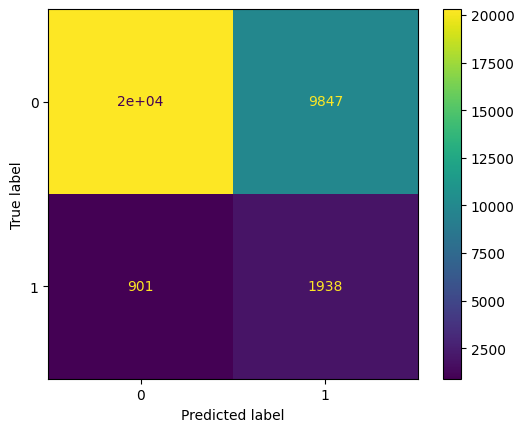

In [30]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

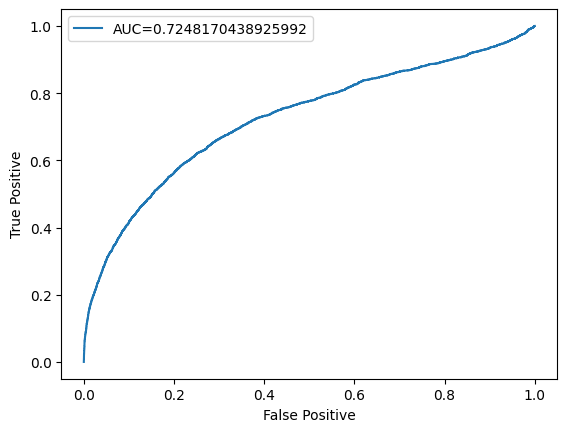

In [31]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

In [32]:
#1.4. BernoulliNB()
nb = BernoulliNB()

nb.fit(X_train, y_train)

y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,1]

In [33]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

TRAIN ACCURACY : 0.913625031722573
TEST ACCURACY : 0.9116835884224882


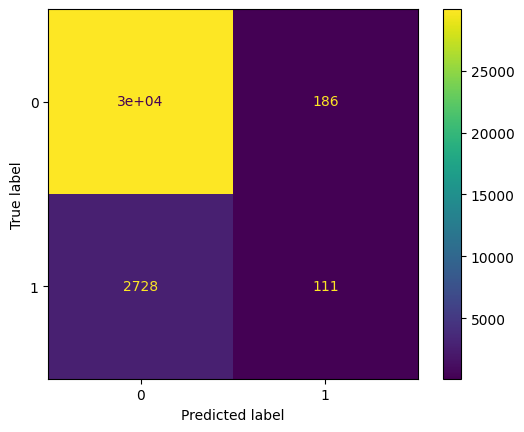

In [34]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

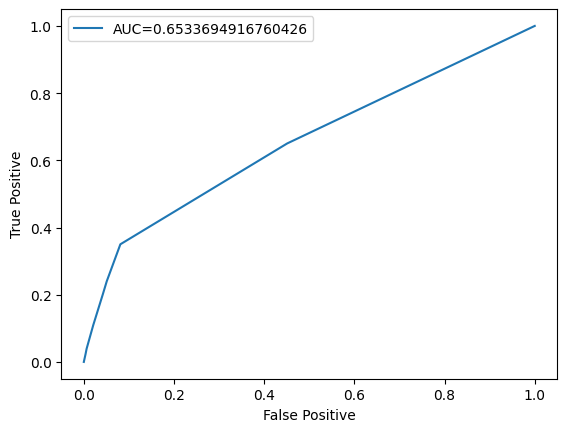

In [35]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

## **3. Выполнить классификацию с использованием дерева решений:**

In [36]:
#1. Попробовать подобрать опытным путем наилучшие значения параметров дерева решений
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier( criterion = "gini", random_state = 30, min_samples_split = 8, min_samples_leaf = 2 )

# criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
# splitter {“best”, “random”}, default=”best”
# max_depth int, default=None
# min_samples_split int or float, default=2
# min_samples_leaf int or float, default=1

clf.fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)[:,1]

In [37]:
print('TRAIN ACCURACY :', accuracy_score( y_train_predict, y_train ))
print('TEST ACCURACY :', accuracy_score( y_test_predict, y_test ))

TRAIN ACCURACY : 0.9822801439085196
TEST ACCURACY : 0.9614487043491438


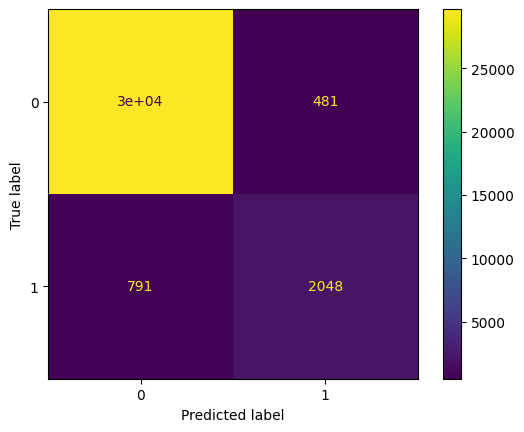

In [38]:
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

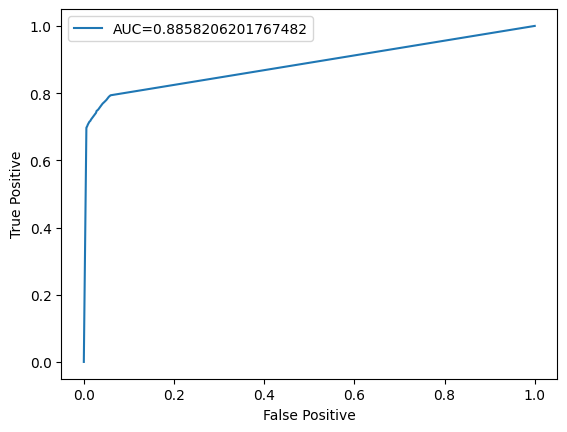

In [39]:
auc = roc_auc_score( y_test, y_test_prob )
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()

In [41]:
from sklearn import tree

textDescr = tree.export_text(clf, feature_names = list(df.columns[:-1]) )
print(textDescr)

|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- age <= 52.50
|   |   |   |--- hypertension <= 0.50
|   |   |   |   |--- bmi <= 31.87
|   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |--- HbA1c_level <= 5.35
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- HbA1c_level >  5.35
|   |   |   |   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |   |   |--- age <= 11.50
|   |   |   |   |   |   |   |   |   |   |--- HbA1c_level <= 6.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- HbA1c_level >  6.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- age >  11.50
|   |   |   |   |   |   |   |   |   |   |--- b

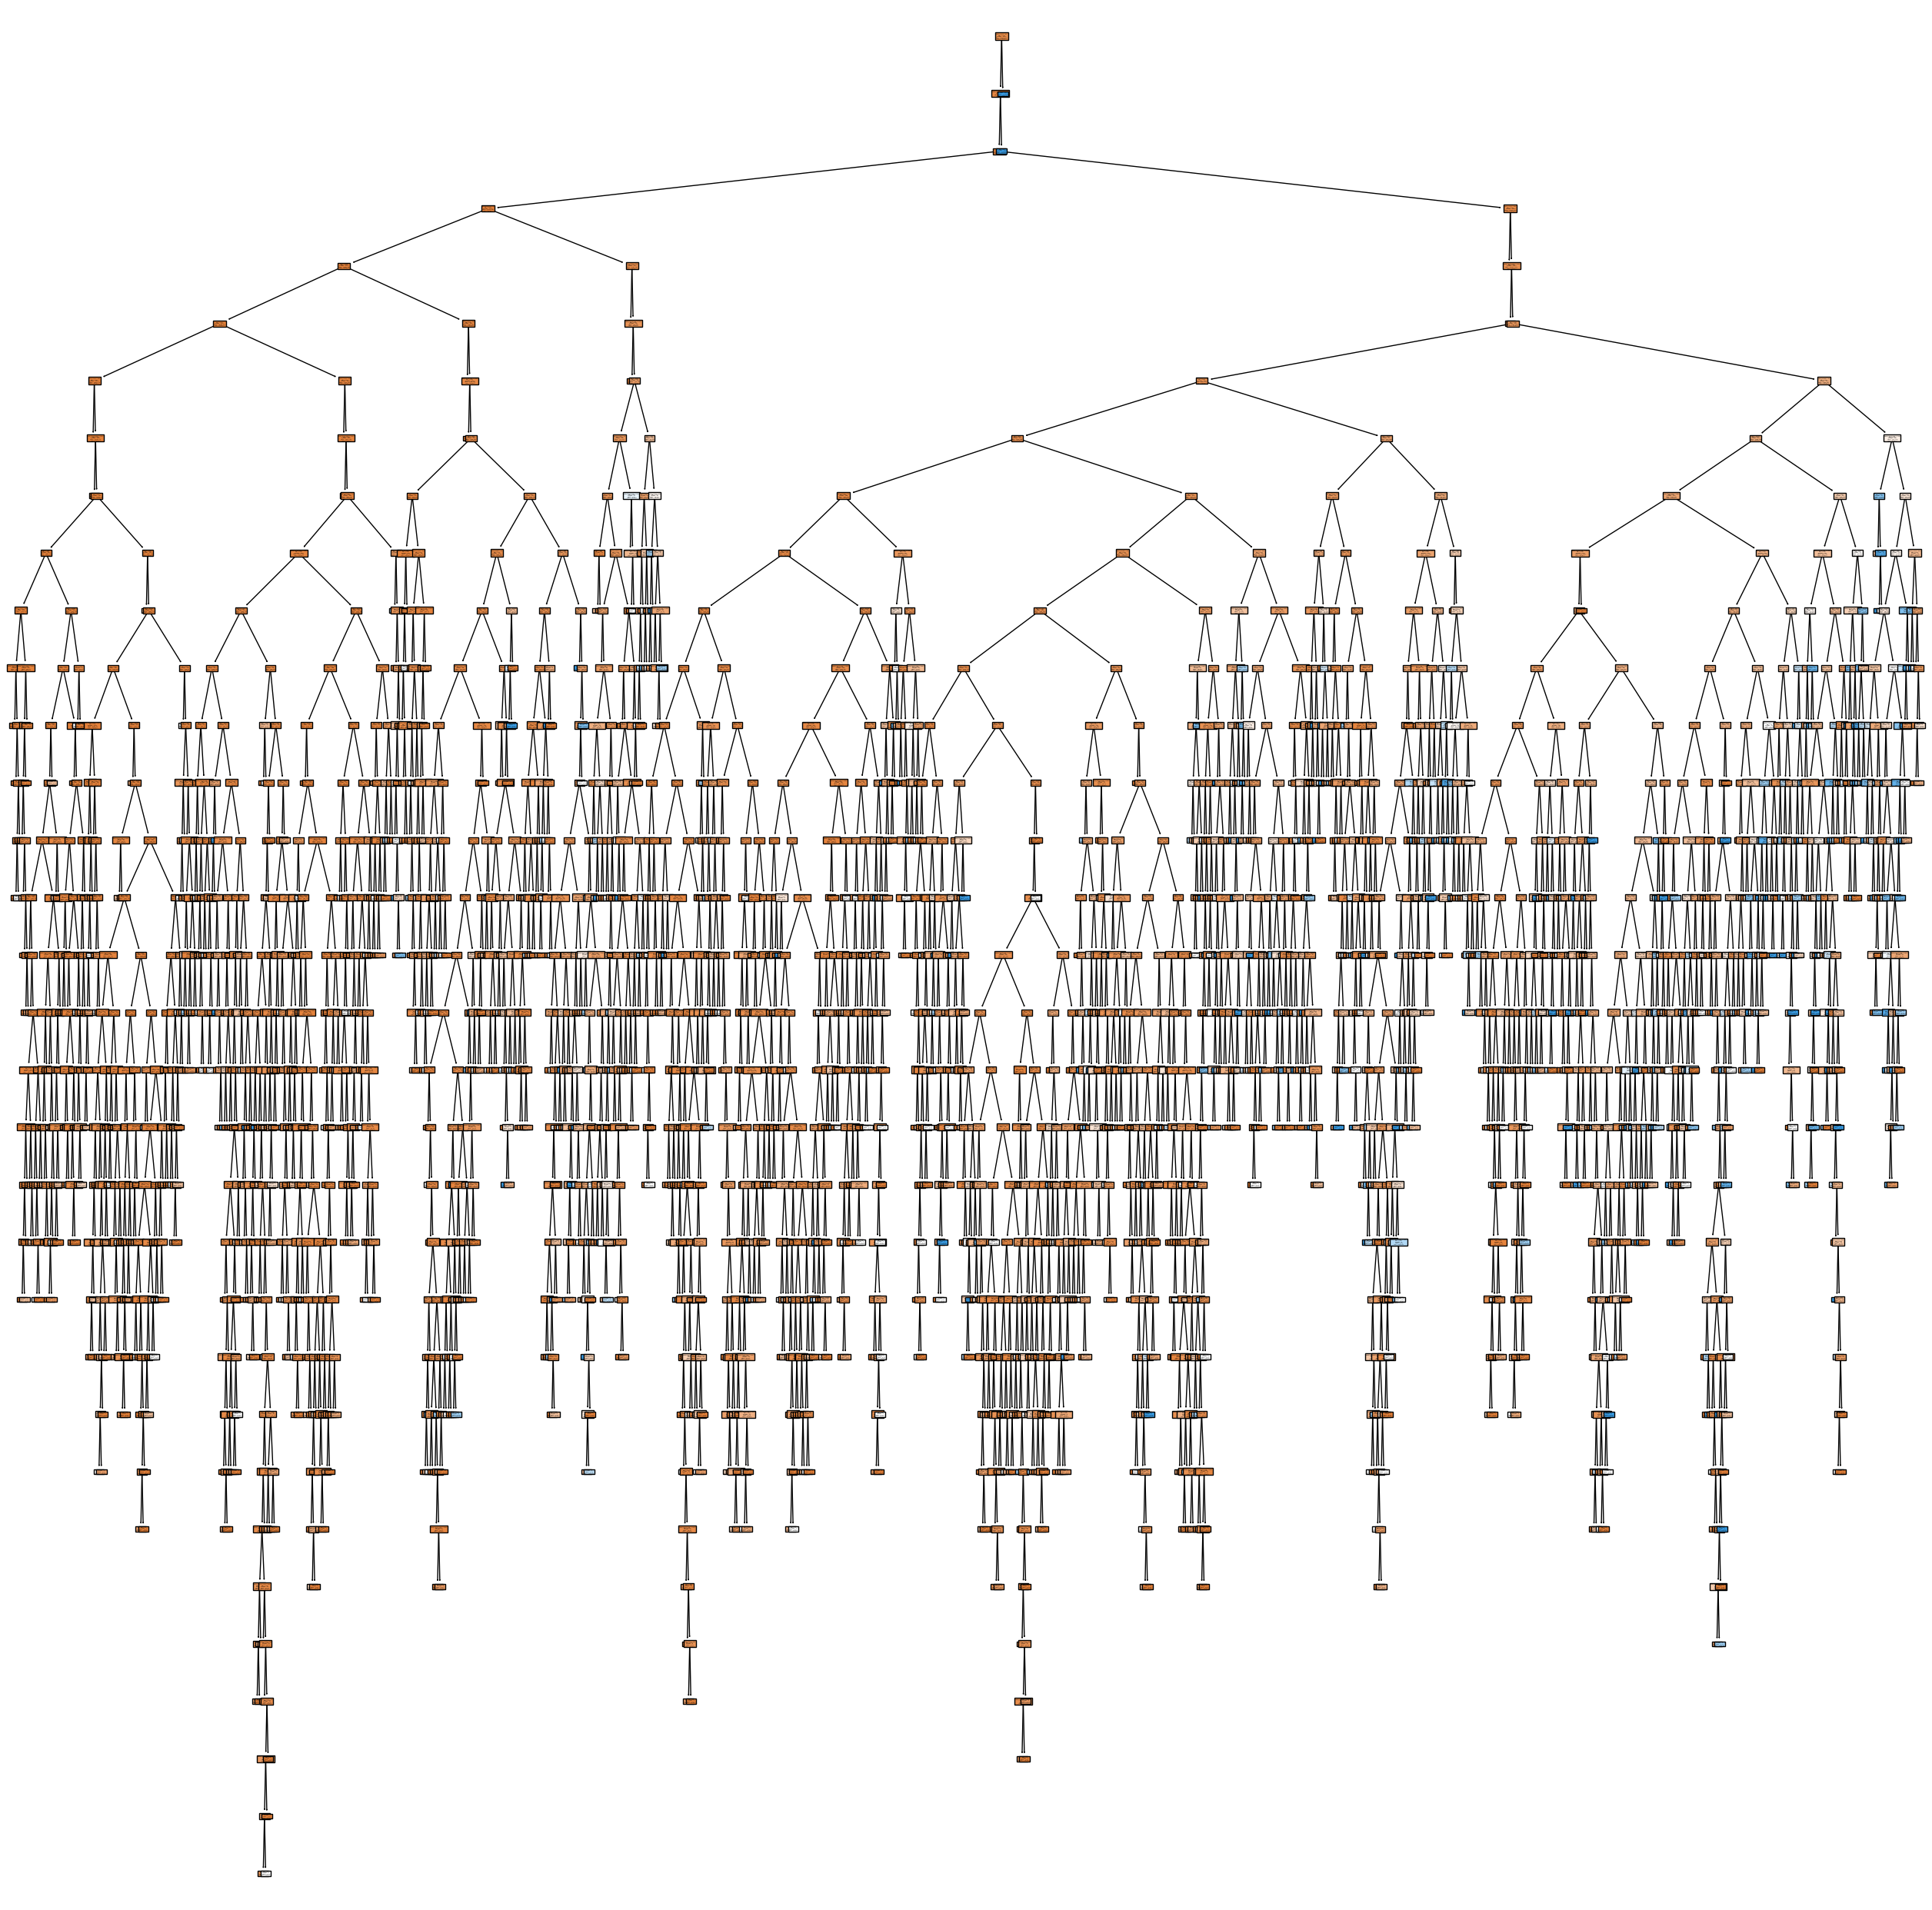

In [42]:
fig = plt.figure(figsize=(32,32))
res = tree.plot_tree(clf, 
                   feature_names = list(df.columns[:-1]) ,  
                   class_names = ["Status No", "Status Yes"],
                   filled = True)

## **4. Выполнить кросс-валидацию**

In [15]:
#1. Для любых моделей классификации - созданных в предыдещих заданиях или новых специально созданных - выполнить кросс-валидацию
#	1.1 Методом K-блочной кросс-валидации (попробовать с различным количеством блоков)
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
simplefilter(action='ignore', category = FutureWarning)

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

# Создаем объект KFold с числом блоков K=5
kFold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Создаем модель для классификации
knn = KNeighborsClassifier(n_neighbors = 5)

# Выполняем кросс-валидацию
scores = cross_val_score(knn, df[["age","bmi", "blood_glucose_level"]], df['diabetes'], cv = kFold)

# Выводим оценки производительности модели на каждой складке
print(f"Оценки производительности модели на каждом блоке: {scores}")
# Выводим среднюю оценку производительности модели
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Оценки производительности модели на каждом блоке: [0.9386908  0.94169125 0.94028806 0.94018804 0.9439888 ]
Средняя оценка качества прогнозирования модели: 0.9409693900574384, средний разброс значений: 0.0017835129198320362


In [16]:
#	1.2 Методом стратифицированной K-блочная кросс-валидации (предварительно проанализировать доли каждого класса в выборках)
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Создаем объект StratifiedKFold с числом блоков K=5
stratifiedKfold = StratifiedKFold(n_splits=5, shuffle = True)

# Создаем модель для классификации
lr = LogisticRegression(multi_class = "ovr", solver='liblinear')

# Выполняем стратифицированную кросс-валидацию
scores = cross_val_score(lr, df[["age","bmi", "blood_glucose_level"]], df['diabetes'], cv = stratifiedKfold)

print(f"Оценки производительности модели на каждом блоке: {scores}")
# Выводим среднюю оценку производительности модели
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

Оценки производительности модели на каждом блоке: [0.93944092 0.94144122 0.93863773 0.94138828 0.9409882 ]
Средняя оценка качества прогнозирования модели: 0.9403792670320833, средний разброс значений: 0.0011340279631156548


In [17]:
#    1.3 Методом Leave-One-Out 
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier

loo = LeaveOneOut()
dtc = DecisionTreeClassifier()

scores = cross_val_score(dtc, df[["age","bmi", "blood_glucose_level"]], df['diabetes'], cv = loo, n_jobs = -1)

#print(f"Оценки производительности модели на каждом блоке: {scores}")
print(f"Количество блоков: {len(scores)}")
print(f"Средняя оценка качества прогнозирования модели: {scores.mean()}, средний разброс значений: {scores.std()}")

KeyboardInterrupt: 